In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tag import pos_tag
mpl.style.use('ggplot')
%matplotlib inline

# Label Information

* 0 - negative
* 1 - somewhat negative
* 2 - neutral
* 3 - somewhat positive
* 4 - positive

In [2]:
data = pd.read_csv('train.tsv', sep='\t') #tsv 파일이기 떄문에 탭으로 구분자를 지어서 파일을 읽어왔다.
data[data['Sentiment'] == 1].head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
33,34,1,"the gander , some of which occasionally amuses...",1
47,48,1,but none of which amounts to much of a story,1
49,50,1,none of which amounts to much of a story,1
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1


In [3]:
data[data['Sentiment'] == 0].head()

,PhraseId,SentenceId,Phrase,Sentiment
101,102,3,would have a hard time sitting through this one,0
103,104,3,have a hard time sitting through this one,0
157,158,5,Aggressive self-glorification and a manipulati...,0
159,160,5,self-glorification and a manipulative whitewash,0
201,202,7,Trouble Every Day is a plodding mess .,0


In [4]:
data[data['Sentiment'] == 3].head()

,PhraseId,SentenceId,Phrase,Sentiment
21,22,1,good for the goose,3
22,23,1,good,3
46,47,1,amuses,3
64,65,2,"This quiet , introspective and entertaining in...",3
67,68,2,"quiet , introspective and entertaining",3


In [5]:
data[data['Sentiment'] == 4].head()

,PhraseId,SentenceId,Phrase,Sentiment
63,64,2,"This quiet , introspective and entertaining in...",4
66,67,2,"quiet , introspective and entertaining indepen...",4
74,75,2,entertaining,4
77,78,2,is worth seeking,4
117,118,4,A positively thrilling combination of ethnogra...,4


In [6]:
data.info() # 데이터가 대략 어떻게 구성되어 있는지 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


# Label별 데이터 분포

   * 0~4까지 라벨들의 분포를 살펴보면 라벨 2의 빈도수가 높은 것을 확인 할 수 있다.

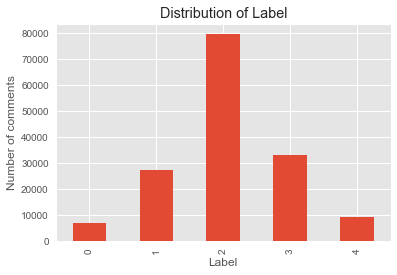

In [7]:
data['Sentiment'].value_counts(sort=False).plot(kind='bar')
plt.title('Distribution of Label')
plt.xlabel('Label')
plt.ylabel('Number of comments')
plt.show()

* 모두 종합하여 전체적으로 단어 빈도수를 확인해서 가장 빈도수가 높은 20개의 단어를 뽑아보자.

In [8]:
word_distribution_dict = defaultdict()

In [9]:
phrase_data = data['Phrase']
phrase_data_length = len(phrase_data)
for i in range(phrase_data_length):
    split_phrase = phrase_data[i].split()
    for word in split_phrase:
        word_lower = word.lower()
        if word_lower not in word_distribution_dict.keys():
            word_distribution_dict[word_lower] = 1
        else:
            word_distribution_dict[word_lower] += 1
print word_distribution_dict
    
     
    

defaultdict(None, {'aided': 5, 'writings': 11, 'bad-boy': 8, 'ryoko': 5, 'yellow': 28, 'pony': 13, 'four': 187, 'woods': 9, 'clotted': 5, 'hanging': 17, 'conjuring': 8, 'woody': 55, 'comically': 24, 'payoff': 72, 'treading': 12, 'hennings': 13, 'augustine': 8, 'sociopathy': 7, 'wizardry': 13, 'originality': 87, 'superficially': 19, 'stevenon': 6, 'xtc': 9, 'lore': 21, 'lord': 39, 'immature': 24, 'levy': 15, 'x-men': 9, 'foul': 37, 'classify': 8, 'screaming': 59, 'picaresque': 8, 'boogaloo': 5, 'disturb': 13, 'sixties-style': 6, 'grueling': 13, 'wooden': 34, 'truck-loving': 12, 'voyeur': 5, 'wednesday': 14, 'peerlessly': 3, 'shouting': 11, 'geeked': 7, 'stereotypical': 46, 'howlingly': 11, 'reliable': 29, 'elegy': 11, 'annie': 7, 'trump': 8, 'sturm': 13, 'less-is-more': 7, 'tired': 192, 'big-wave': 14, 'miller': 46, 'bacon': 16, 'pulse': 34, '270': 7, 'elegant': 64, 'second': 190, 'crisply': 3, 'valiant': 16, 'shrugging': 23, 'sterile': 7, 'driven': 20, 'hilariously': 21, 'hit-man': 10,

* 내림차순으로 정렬해보았을 때 Top 10 단어

In [10]:
sorted_dict = sorted(word_distribution_dict.items(), key = lambda x : x[1], reverse=True)
sorted_dict[:10]

[('the', 51220),
 (',', 42006),
 ('a', 36123),
 ('of', 32308),
 ('and', 31763),
 ('to', 22448),
 ('.', 17565),
 ("'s", 16971),
 ('in', 13745),
 ('is', 13447)]

* Pharse 단어 Corpus에서 출현 빈도 Top20 단어 그래프

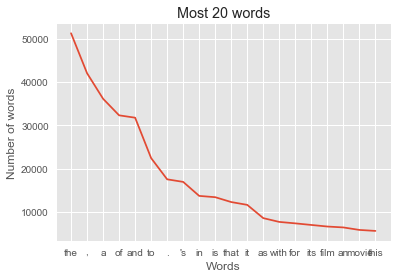

In [11]:
word_data = sorted_dict
word, value = zip(*word_data[:20])
plt.plot((value))
plt.xticks(np.arange(len(word)), word)
plt.xlabel('Words')
plt.ylabel('Number of words')
plt.title('Most 20 words')
plt.show()

* Phrase 처리를 하기 편하게 하기 위해 Phrase를 split함수를 이용하여 각 문장을 단어별로 쪼개기

In [12]:
split_phrase = [[j.lower() for j in x.split()] for x in np.array(data['Phrase'])]
data['Split_phrase'] = split_phrase

In [13]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment,Split_phrase
0,1,1,A series of escapades demonstrating the adage ...,1,"[a, series, of, escapades, demonstrating, the,..."
1,2,1,A series of escapades demonstrating the adage ...,2,"[a, series, of, escapades, demonstrating, the,..."
2,3,1,A series,2,"[a, series]"
3,4,1,A,2,[a]
4,5,1,series,2,[series]


### 각 Label별 10개 대표 단어

In [14]:
word_dict = {}
for sentiment in data['Sentiment'].unique():
    word_dict[sentiment] = Counter()
    match_sentiment = (data['Sentiment'] == sentiment)
    for word in data[match_sentiment]['Split_phrase']:
        word_dict[sentiment].update(word)

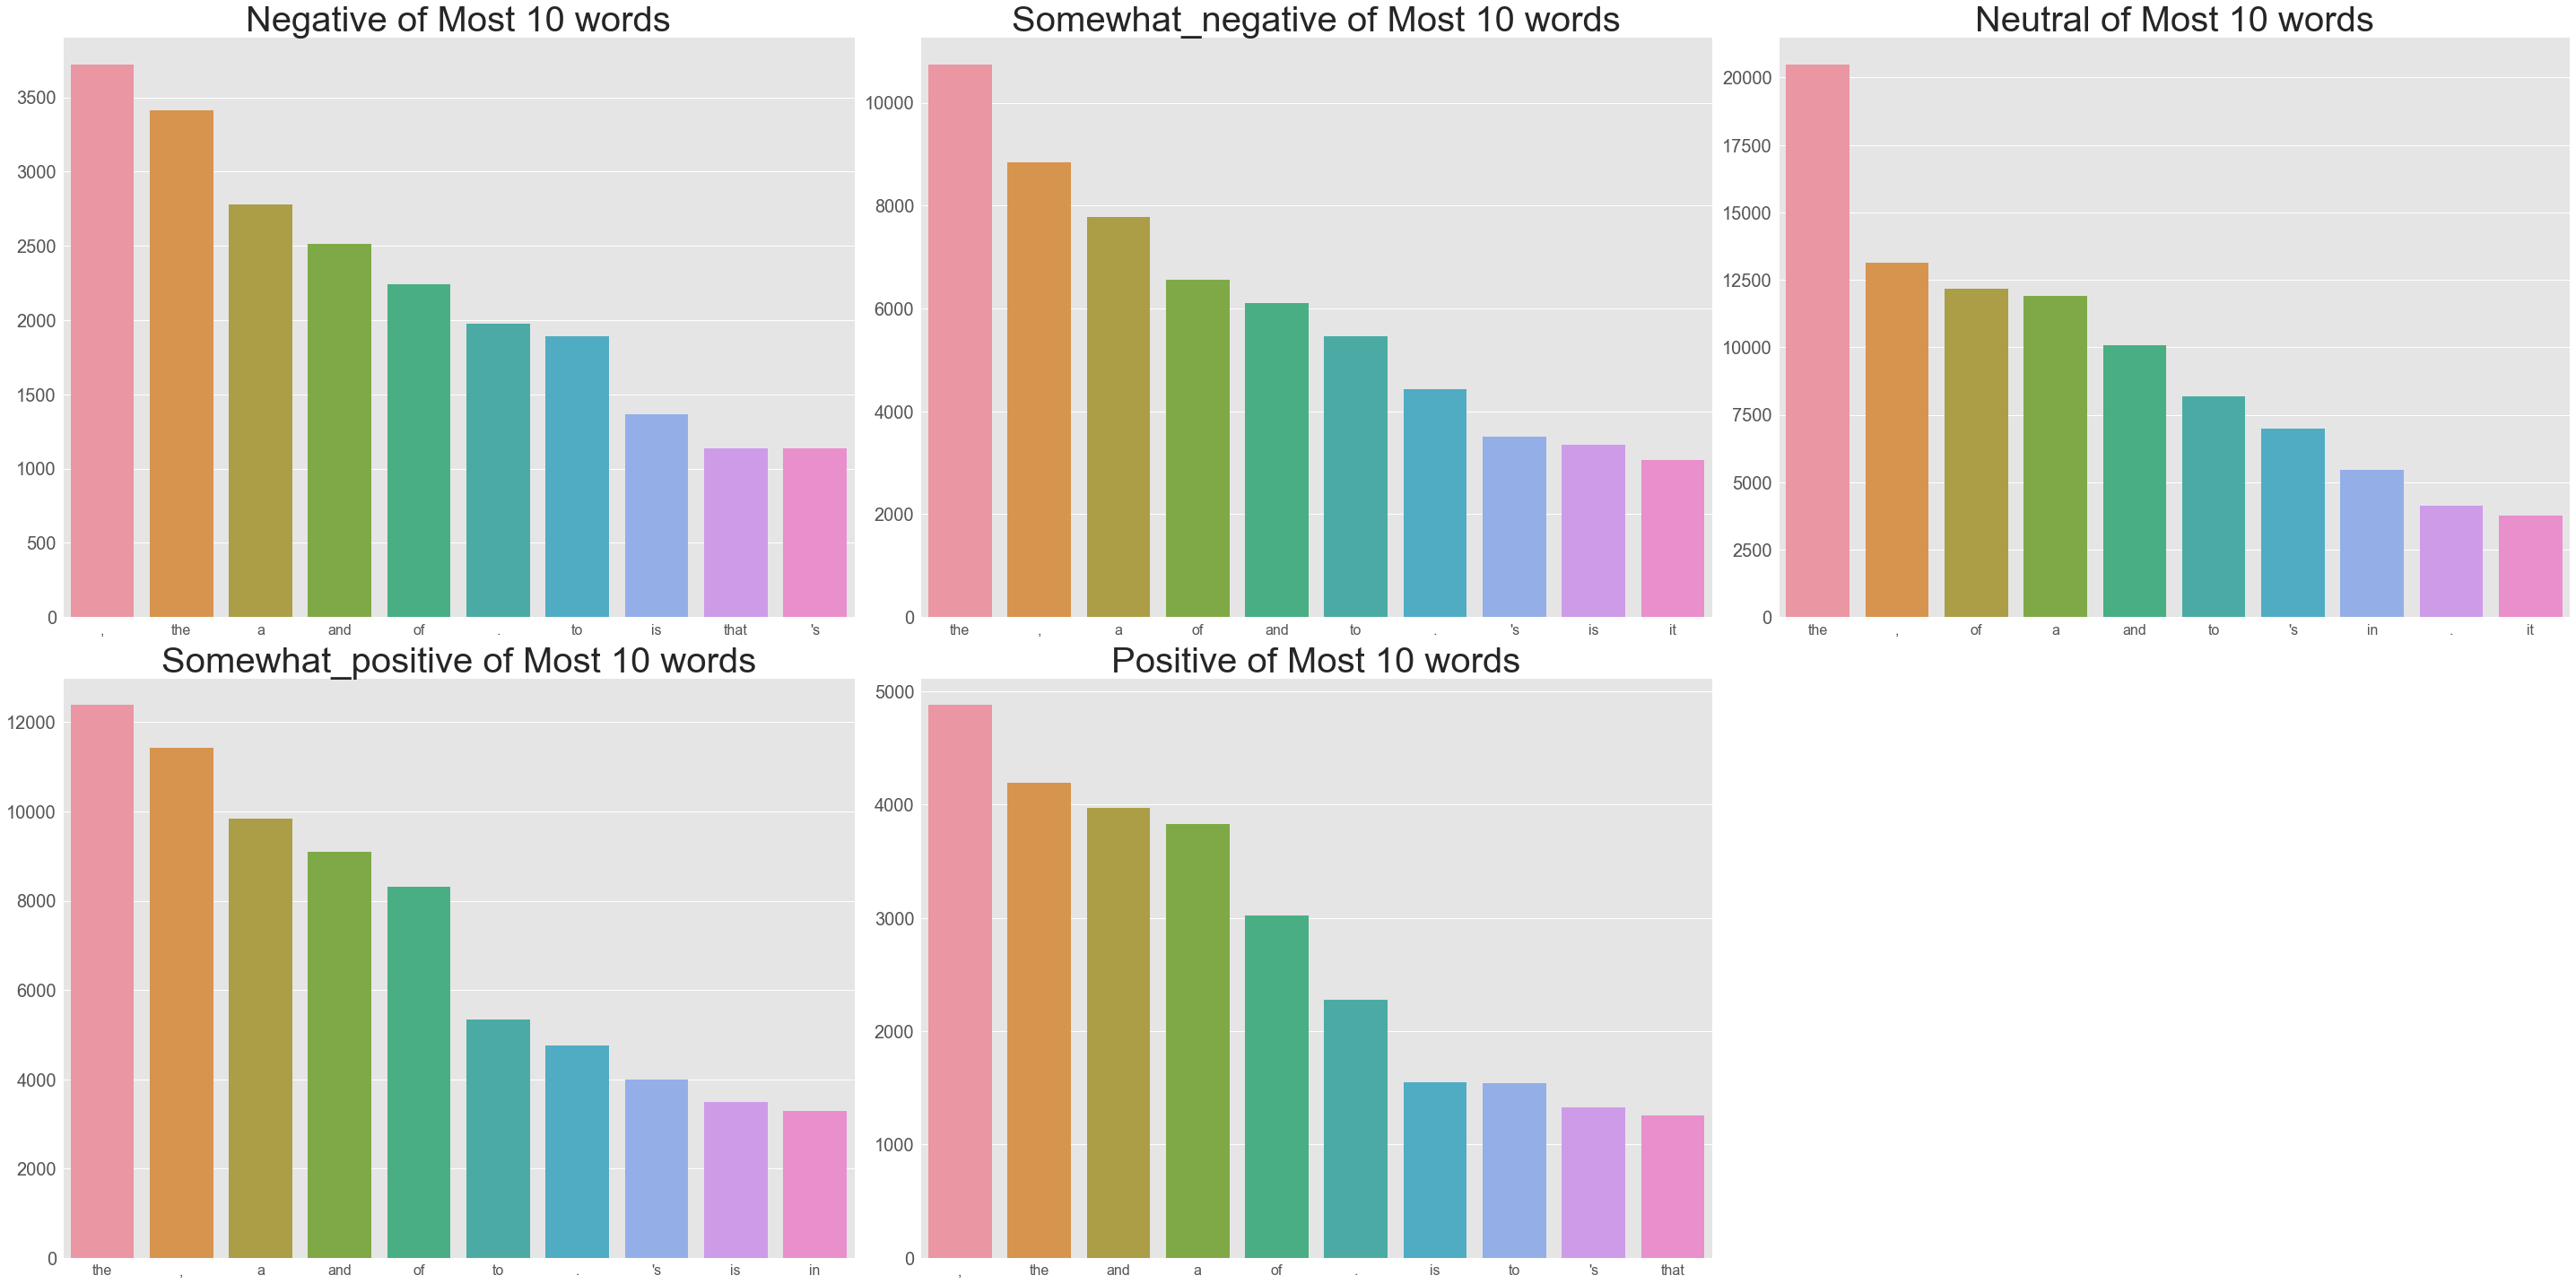

In [15]:
def make_graph(top10_list, label):
    plt.figure(figsize=(40,20))
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 20
    for num,(top_10_adj, name) in enumerate(zip(top10_list, label)):
        plt.subplot(2, 3, num+1)
        sns.barplot(x = map(lambda x : x[0], top_10_adj), y = map(lambda x : x[1], top_10_adj))
        plt.tight_layout()
        plt.title('{} of Most 10 words'.format(name), {'fontsize' : 40})
        
top_10_negative = word_dict[0].most_common(10)
top_10_somewhat_negative = word_dict[1].most_common(10)
top_10_neutral = word_dict[2].most_common(10)
top_10_somewhat_positive = word_dict[3].most_common(10)
top_10_positive = word_dict[4].most_common(10)

top_10_list = [top_10_negative, top_10_somewhat_negative, top_10_neutral, 
               top_10_somewhat_positive,top_10_positive]
label = ['Negative', 'Somewhat_negative', 'Neutral', 'Somewhat_positive', 'Positive']
make_graph(top_10_list, label)

* 단순히 각 라벨별로 가장 많이 나타난 Top10 단어들을 그래프로 나타내보았다.
* 각 라벨별로 전처리 하기 전에는 the, , a , of, to, is, that 같은 의미 없는 단어가 많이 나와 있는 것을 볼 수 있다.
* 그래서 정확하게 각 라벨별로 어떤 단어가 많이 나타나는지 알기 어렵다.

# 라벨별로 Phrase 나눠보기

* DataFrame에서 각 라벨별로 Data를 추려본다.

In [16]:
negative = data[data['Sentiment'] == 0]
somewhat_negative = data[data['Sentiment'] == 1]
neutral = data[data['Sentiment'] == 2]
somewhat_positive = data[data['Sentiment'] == 3]
positive = data[data['Sentiment'] == 4]

* 각각 라벨별로 DataFrame을 따로 만들어보았다. 그리고 나서 split함수를 적용하여 Phrase를 단어로 쪼개고 그 정보를
  각 라벨별로 추가하였다.

In [18]:
def make_each_dataframe(frame):
    dataframe = pd.DataFrame()
    make_array = np.array(frame['Phrase'])
    if set(frame['Sentiment']) == {0}:
        dataframe = pd.DataFrame(make_array, columns=['Negative_comment'])
    elif set(frame['Sentiment']) == {1}:
        dataframe = pd.DataFrame(make_array, columns=['Somewhat_negative'])
    elif set(frame['Sentiment']) == {2}:
        dataframe = pd.DataFrame(make_array, columns=['Neutral'])
    elif set(frame['Sentiment']) == {3}:
        dataframe = pd.DataFrame(make_array, columns=['Somewhat_positive'])
    elif set(frame['Sentiment']) == {4}:
        dataframe = pd.DataFrame(make_array, columns=['Positive'])
                                   
    return dataframe

def phrase_split(frame):
    frame_columns = frame.columns[0]
    frame['Split_phrase'] = [[j.lower() for j in x.split()] for x in np.array(frame[frame_columns])]
    return frame

negative_df = phrase_split(make_each_dataframe(negative))
somewhat_negative_df = phrase_split(make_each_dataframe(somewhat_negative))
neutral_df = phrase_split(make_each_dataframe(neutral))
somewhat_positive_df = phrase_split(make_each_dataframe(somewhat_positive))
positive_df = phrase_split(make_each_dataframe(positive))

* 주로 느낌을 나타내는 품사는 형용사이기 때문에 nltk의 pos_tag 함수를 이용하여 품사가 형용사인 단어들만 각 라벨별로 추려보자.

    JJ : 형용사

* Pos_tag를 적용하여 각 라벨별 형용사를 추려보고 각 라벨별 형용사 리스트를 만들어보았다.

In [19]:
def pos_tagging_adaptation(frame):
    make_list = []
    split_phrase = frame['Split_phrase']
    frame_length = len(frame['Split_phrase'])
    for i in range(frame_length):
        check_tag = pos_tag(split_phrase[i])
        for num, _ in enumerate(check_tag):
            if check_tag[num][1] == 'JJ':
                make_list.append(check_tag[num][0])
    
    return make_list

negative_adj = pos_tagging_adaptation(negative_df)                   # Label = 0(negative)인 Pos_tag를 적용한 형용사 리스트
somewhat_negative_adj = pos_tagging_adaptation(somewhat_negative_df) # Label = 1(Somewhat_negative)인 Pos_tag를 적용한 형용사 리스트
neutral_adj = pos_tagging_adaptation(neutral_df)                     # Label = 2(Neutral)인 Pos_tag를 적용한 형용사 리스트
somewhat_positive_adj = pos_tagging_adaptation(somewhat_positive_df) # Label = 3(somewhat_positive)인 Pos_tag를 적용한 형용사 리스트
positive_adj = pos_tagging_adaptation(positive_df)                   # Label = 4(Positive)인 Pos_tag를 적용한 형용사 리스트

* 각 라벨별로 상위 10개의 출현 단어를 만들어보자.

- TF-IDF Score 적용
    * TF-IDF(Term Frequency-Inverse Document Frequency)는 단어를 갯수 그대로 카운팅하지 않고 모든 문서에 공통적으로 나타나는 단어의 경우 중요도가 떨어진다고 판단하여 가중치를 적게 부여한다. 반면 모든 문서가 아닌 특정 문서에 많이 나타나는 단어의 경우 중요도가 높다고 판단하여 가중치를 높게 부여하는 방법으로 각각 문서에 있어서 가장 핵심이 되는 단어를 구할 수 있는 방법이다.
    
구체적으로는 문서 $d$(document)와 단어 $t$ 에 대해 다음과 같이 계산한다.

$$ \text{tf-idf}(d, t) = \text{tf}(d, t) \cdot \text{idf}(d, t) $$


여기에서

* $\text{tf}(d, t)$: 단어의 빈도수
* $\text{idf}(d, t)$ : inverse document frequency 
 
 $$ \text{idf}(d, t) = \log \dfrac{n_d}{1 + \text{df}(t)} $$
 
* $n_d$ : 전체 문서의 수
* $\text{df}(t)$:  단어 $t$를 가진 문서의 수

In [20]:
def make_top_10_label_adj(datas):
    total_top_10_label_adj_list = []               
    # 각각 라벨별로 Tf-idf Score가 높은 10개의 단어들로 이루어진 리스트를 저장 할 리스트
    tf_idf = TfidfVectorizer(max_df=0.8)
    datas_matrix = tf_idf.fit_transform(datas) 
    get_feature_names = tf_idf.get_feature_names() 
    # Tf-idf 인코딩을 하는데 사용된 모든 단어
    get_dense = datas_matrix.todense()             
    # 각각의 라벨별로 Tf-idf score를 산출한 값 

    for i, _ in enumerate(datas):
        label_adj_list = get_dense[i].tolist()[0] 
        # 각 라벨별 Tf-idf score값이 저장된 리스트, 
        # ex) get_dense[0].tolist()[0] = negative_adj_list
        #     get_dense[1].tolist()[0] = somewhat_negative_adj_list
        tf_idf_score = [case for case in zip(range(0, len(label_adj_list)), label_adj_list) if case[1] > 0]
        sorted_score = sorted(tf_idf_score, key = lambda x : x[1], reverse = True) 
        # Tf-idf Score를 내림차순으로 정렬
        top_10_label_adj = [(get_feature_names[word_index], score) for (word_index, score) in sorted_score][:10] 
                                                                        # 각 라벨별로 Tf-idf score가 높은 순서대로 10개 단어 리스트 만듦
        total_top_10_label_adj_list.append(top_10_label_adj)            # 최종 리스트에 저장
        
    return total_top_10_label_adj_list

adjdatas = [' '.join(negative_adj), ' '.join(somewhat_negative_adj), ' '.join(neutral_adj),
                 ' '.join(somewhat_positive_adj), ' '.join(positive_adj)]

total_top_10_sentiment_adj = make_top_10_label_adj(adjdatas)
top_10_negative_adj, top_10_somewhat_negative_adj, top_10_neutral_adj, top_10_somewhat_positive_adj, top_10_positive_adj = \
total_top_10_sentiment_adj

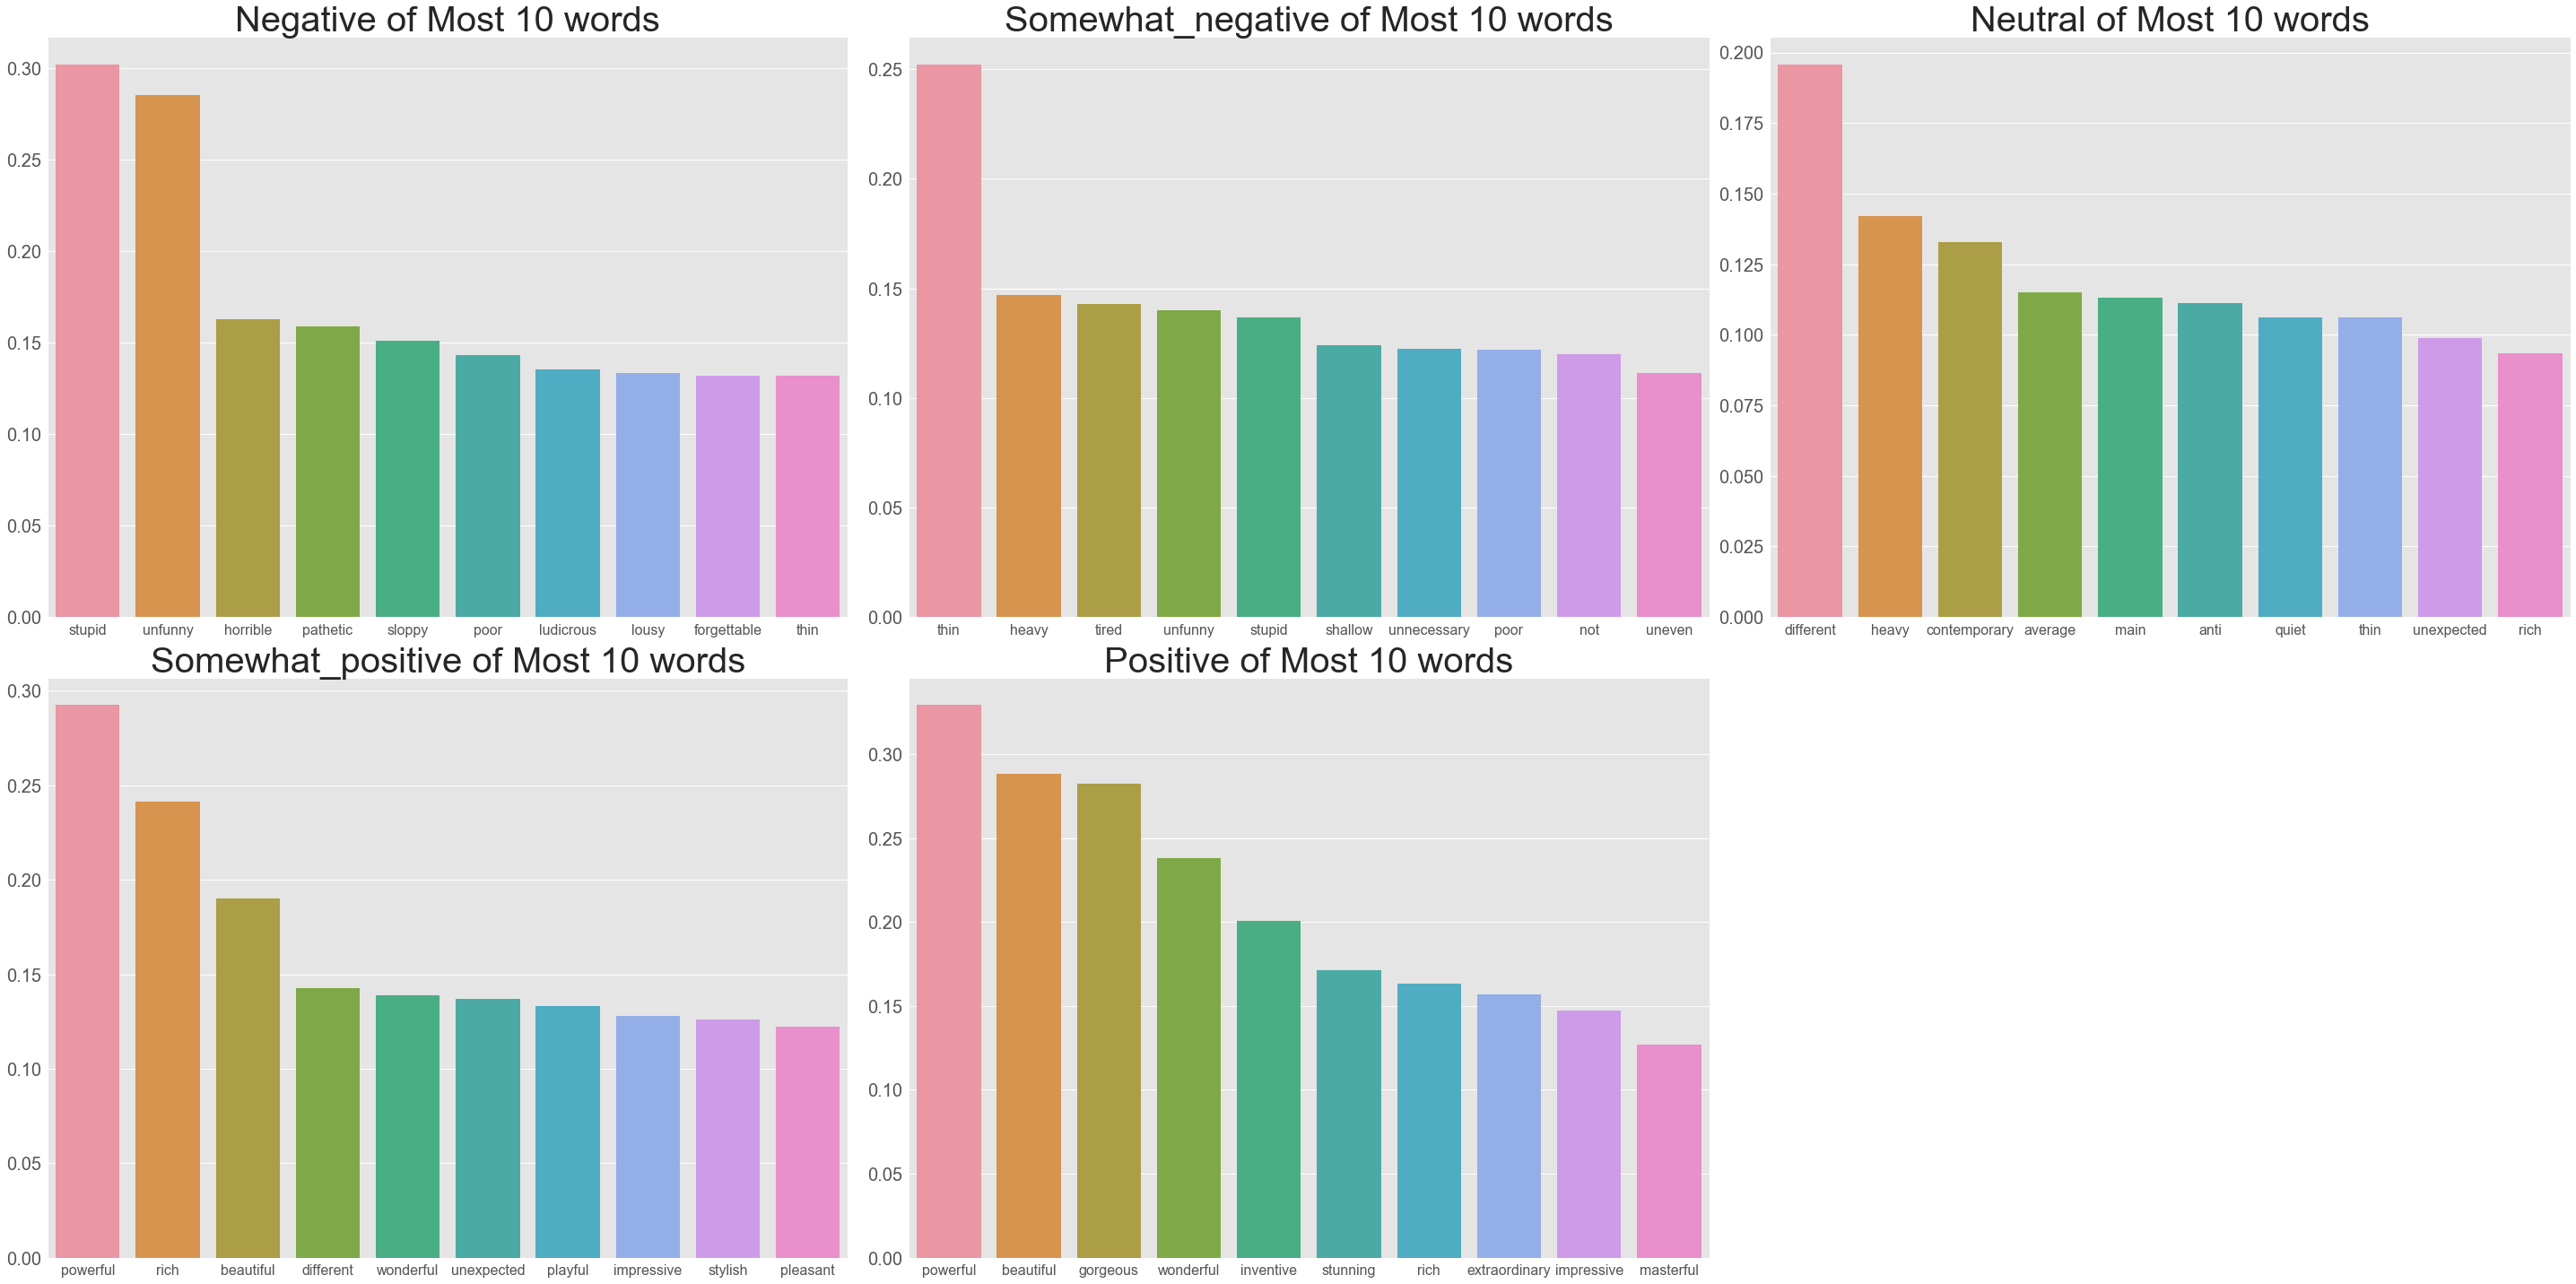

In [21]:
def make_graph(adj_list, label):
    plt.figure(figsize=(40,20))
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 20
    for num,(top_10_adj, name) in enumerate(zip(adj_list, label)):
        plt.subplot(2, 3, num+1)
        sns.barplot(x = map(lambda x : x[0], top_10_adj), y = map(lambda x : x[1], top_10_adj))
        plt.tight_layout()
        plt.title('{} of Most 10 words'.format(name), {'fontsize' : 40})
        
top_10_adj = [top_10_negative_adj, top_10_somewhat_negative_adj, top_10_neutral_adj, top_10_somewhat_positive_adj, top_10_positive_adj]
label = ['Negative', 'Somewhat_negative', 'Neutral', 'Somewhat_positive', 'Positive']
make_graph(top_10_adj, label)

* 각 라벨별로 TF-IDF Score 상위 10개의 형용사 단어들을 그래프로 나타내보았다. 
    * Sentiment : ***Negative***의 경우, stupid 단어가 가장 많이 나왔고 그 밑으로 , unhappy, horrible등의 부정적인 단어들이 많이 나타나고 있음을 알 수 있다.
    * Sentiment : ***Somewhat_negative***의 경우, thin(가볍다) 라는 단어가 가장 많이 나왔고 그 밑으로, heavy, tired 등 다소 부정적인 단어들이 나오고 있음을 알 수 있다.
    * Sentiment : ***Neutral***의 경우 different 단어가 가장 많이 나왔고, 그 밑으로 heavy, contemporary, average 등 다소 중립적인(애매모호한) 단어들이 나타나는 것을  수 있다.
    * Sentiment : ***Somewhat_positive***의 경우 Positive의 경우보다는 약간 적지만 Powerful, rich, beautiful, different, wonderful 등 긍정적인 느낌의 단어들이 많이 나타나고 있음을 알 수 있다.
    * Sentiment : ***Positive***의 경우 Powerful, beautiful, 그리고 gorgeous, wonderful, inventive, stunning, rich, extraordinary, impressive, masterful의 긍정적인 단어가 많이 나타나고 있음을 알 수 있다.
    
    
* 보통 different는 '다르다' 라는 뜻으로 많이 쓰이지만 문맥에서의 쓰임에 따라 의미가 달라질 수 있다. 긍정적인 의미에서 다른 영화들과 다르다 라는 의미로 사용될 수 있다. 또한 부정적인 의미로도 사용될 수 있다. 예를 들면 다른 영화들과 다르게 재미가 없다..등 또한 중립적인 의미로도 사용될 수 있으므로 different는 다양한 뜻을 가진 단어로 해석할 수 있다.